### Run basic `scanpy` QC and doublet detection with `scrublet` for **PBMC Tuberculosis** _Cai Y et al 2020_

**Objective**: Review QC process and suggest changes

- **Developed by**: Carlos Talavera-López PhD
- **Modified by**: Mairi McClean
- **Computational Health Centre - Helmholtz Munich**
- ORIGINAL: v221014; MODIFIED: v221116

### Load required modules

In [61]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [62]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
annoy               NA
appdirs             1.4.4
appnope             0.1.3
asttokens           NA
attr                22.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
cattr               NA
cattrs              NA
certifi             2022.09.24
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
entrypoints         0.4
exceptiongroup      1.0.4
executing           1.1.1
future              0.18.2
google              NA
h5py                3.6.0
hypergeom_ufunc     NA
idna                3.4
ipykernel           6.16.2
ipywidgets          8.0.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.6.1
matplotlib_inline   0.1.6
mpl_toolkits

### Read datasets

In [63]:
adata = sc.read_h5ad('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/CaiY2020_PBMC_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 3701271 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch'
    var: 'gene_name'

In [64]:
adata.var

gene_name
gene_id                       
ENSG00000223972.5      DDX11L1
ENSG00000227232.5       WASH7P
ENSG00000278267.1    MIR6859-1
ENSG00000243485.5  MIR1302-2HG
ENSG00000284332.1    MIR1302-2
...                        ...
ENSG00000198695.2       MT-ND6
ENSG00000210194.1        MT-TE
ENSG00000198727.2       MT-CYB
ENSG00000210195.2        MT-TT
ENSG00000210196.2        MT-TP

[61533 rows x 1 columns]

In [65]:
adata.obs

study    individual     sample tissue  \
barcode                                                             
AAACCTGAGAAACGAG-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAAACGCC-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAACAACT-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAACAATC-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
AAACCTGAGAACTGTA-acTB3  CaiY_2021  SAMN14048025  PBMC_TB_3   PBMC   
...                           ...           ...        ...    ...   
TTTGTCATCTTGTTTG-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTACAC-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTACGT-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTAGGG-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   
TTTGTCATCTTTAGTC-H1     CaiY_2021  SAMN14048019  PBMC_HC_1   PBMC   

                               donor age gender     status data_type  \
barcode                                                                
AAACCTGAGAAACGAG-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAAACGCC-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAACAACT-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAACAATC-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
AAACCTGAGAACTGTA-acTB3  SAMN14048025  34   male  active_TB  scRNAseq   
...                              ...  ..    ...        ...       ...   
TTTGTCATCTTGTTTG-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTACAC-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTACGT-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTAGGG-H1     SAMN14048019  26   male    Healthy  scRNAseq   
TTTGTCATCTTTAGTC-H1     SAMN14048019  26   male    Healthy  scRNAseq   

                                     centre version  batch  
barcode                                                     
AAACCTGAGAAACGAG-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAAACGCC-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAACAACT-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAACAATC-acTB3  Shenzhen University   10XV2  acTB3  
AAACCTGAGAACTGTA-acTB3  Shenzhen University   10XV2  acTB3  
...                                     ...     ...    ...  
TTTGTCATCTTGTTTG-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTACAC-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTACGT-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTAGGG-H1     Shenzhen University   10XV2     H1  
TTTGTCATCTTTAGTC-H1     Shenzhen University   10XV2     H1  

[3701271 rows x 12 columns]

In [66]:
# checks the number of molecules counted per barcode(?), using "donor" as proxy(?)
adata.obs['donor'].value_counts()

SAMN14048024    619020
SAMN14048021    551750
SAMN14048022    531457
SAMN14048020    524019
SAMN14048019    519223
SAMN14048023    490097
SAMN14048025    465705
Name: donor, dtype: int64

In [67]:
adata.obs['data_type'].value_counts

<bound method IndexOpsMixin.value_counts of barcode
AAACCTGAGAAACGAG-acTB3    scRNAseq
AAACCTGAGAAACGCC-acTB3    scRNAseq
AAACCTGAGAACAACT-acTB3    scRNAseq
AAACCTGAGAACAATC-acTB3    scRNAseq
AAACCTGAGAACTGTA-acTB3    scRNAseq
                            ...   
TTTGTCATCTTGTTTG-H1       scRNAseq
TTTGTCATCTTTACAC-H1       scRNAseq
TTTGTCATCTTTACGT-H1       scRNAseq
TTTGTCATCTTTAGGG-H1       scRNAseq
TTTGTCATCTTTAGTC-H1       scRNAseq
Name: data_type, Length: 3701271, dtype: category
Categories (1, object): ['scRNAseq']>

In [68]:
adata.var_names_make_unique()
sample_object = adata.copy()
sample_object

AnnData object with n_obs × n_vars = 3701271 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch'
    var: 'gene_name'

### Replace gene symbols 

#### Performed to ensure that concatenation of the indexes is smoother

In [69]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_id
gene_name                     
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [70]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


### Initial scatterplot of top 20 genes


normalizing counts per cell


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:01)


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


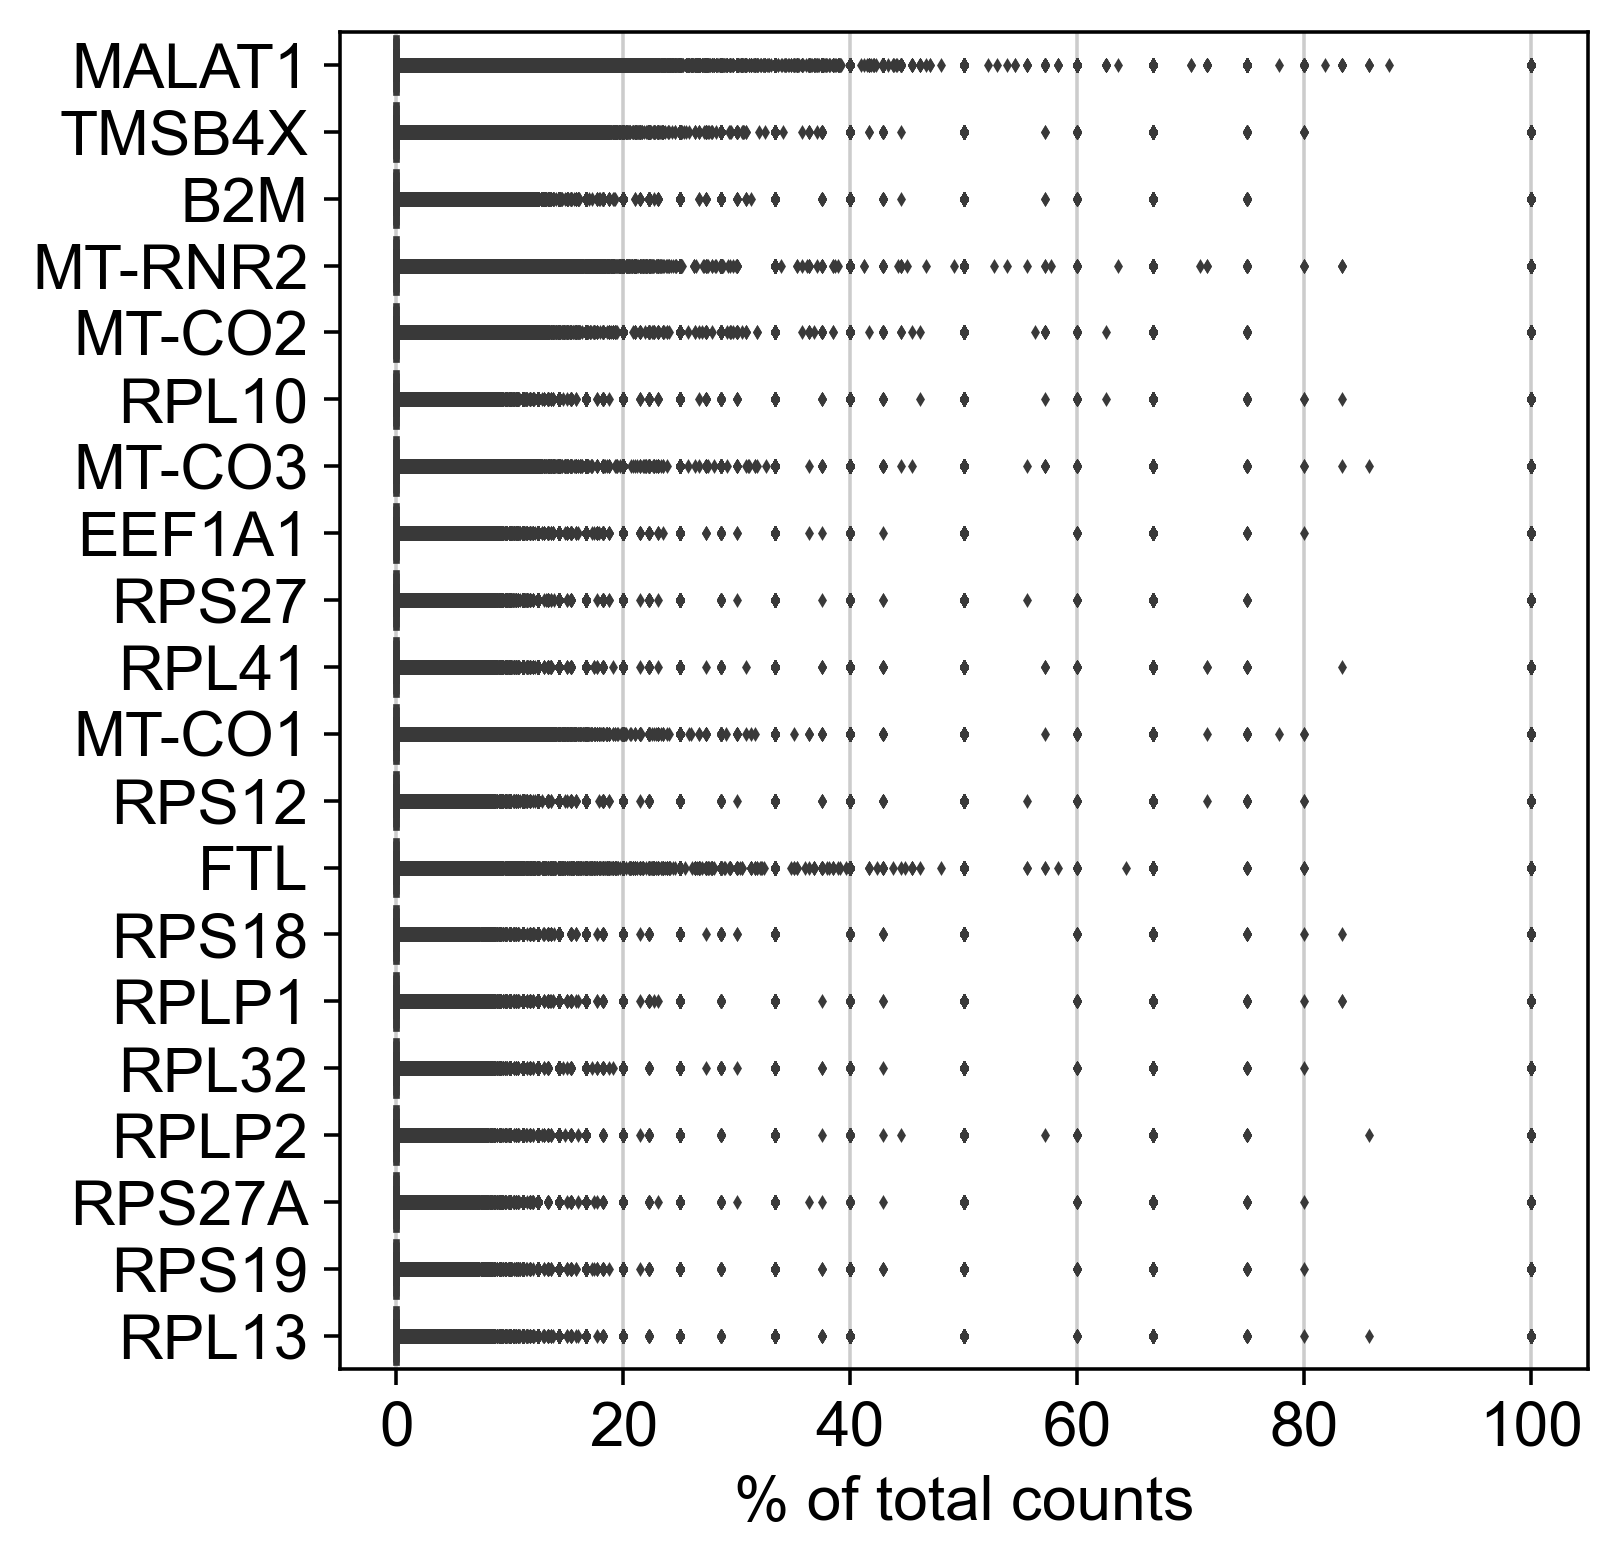

In [71]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Filter cells with less than 200 genes

In [72]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 3628125 cells that have less than 200 genes expressed
73146 61533


In [73]:
sample_object.shape

(73146, 61533)

In [74]:
sample_object.var

gene_id
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1
...                        ...
MT-ND6       ENSG00000198695.2
MT-TE        ENSG00000210194.1
MT-CYB       ENSG00000198727.2
MT-TT        ENSG00000210195.2
MT-TP        ENSG00000210196.2

[61533 rows x 1 columns]

### Compute QC stats

In [75]:
# MT and ribo filtering is separated here, as I was unsure why ribosomal RNA was filtered out when it is not mentioned in other tutorials/resources

In [76]:
sample_object.shape

(73146, 61533)

In [77]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var

gene_id     mt   ribo
DDX11L1      ENSG00000223972.5  False  False
WASH7P       ENSG00000227232.5  False  False
MIR6859-1    ENSG00000278267.1  False  False
MIR1302-2HG  ENSG00000243485.5  False  False
MIR1302-2    ENSG00000284332.1  False  False
...                        ...    ...    ...
MT-ND6       ENSG00000198695.2   True  False
MT-TE        ENSG00000210194.1   True  False
MT-CYB       ENSG00000198727.2   True  False
MT-TT        ENSG00000210195.2   True  False
MT-TP        ENSG00000210196.2   True  False

[61533 rows x 3 columns]

In [78]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo'], percent_top = None, log1p = False, inplace = True)

In [79]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1).A1

In [80]:
sample_object

AnnData object with n_obs × n_vars = 73146 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Visualise QC metrics

In [81]:
sample_object.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'ENSG00000238009',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=61533)

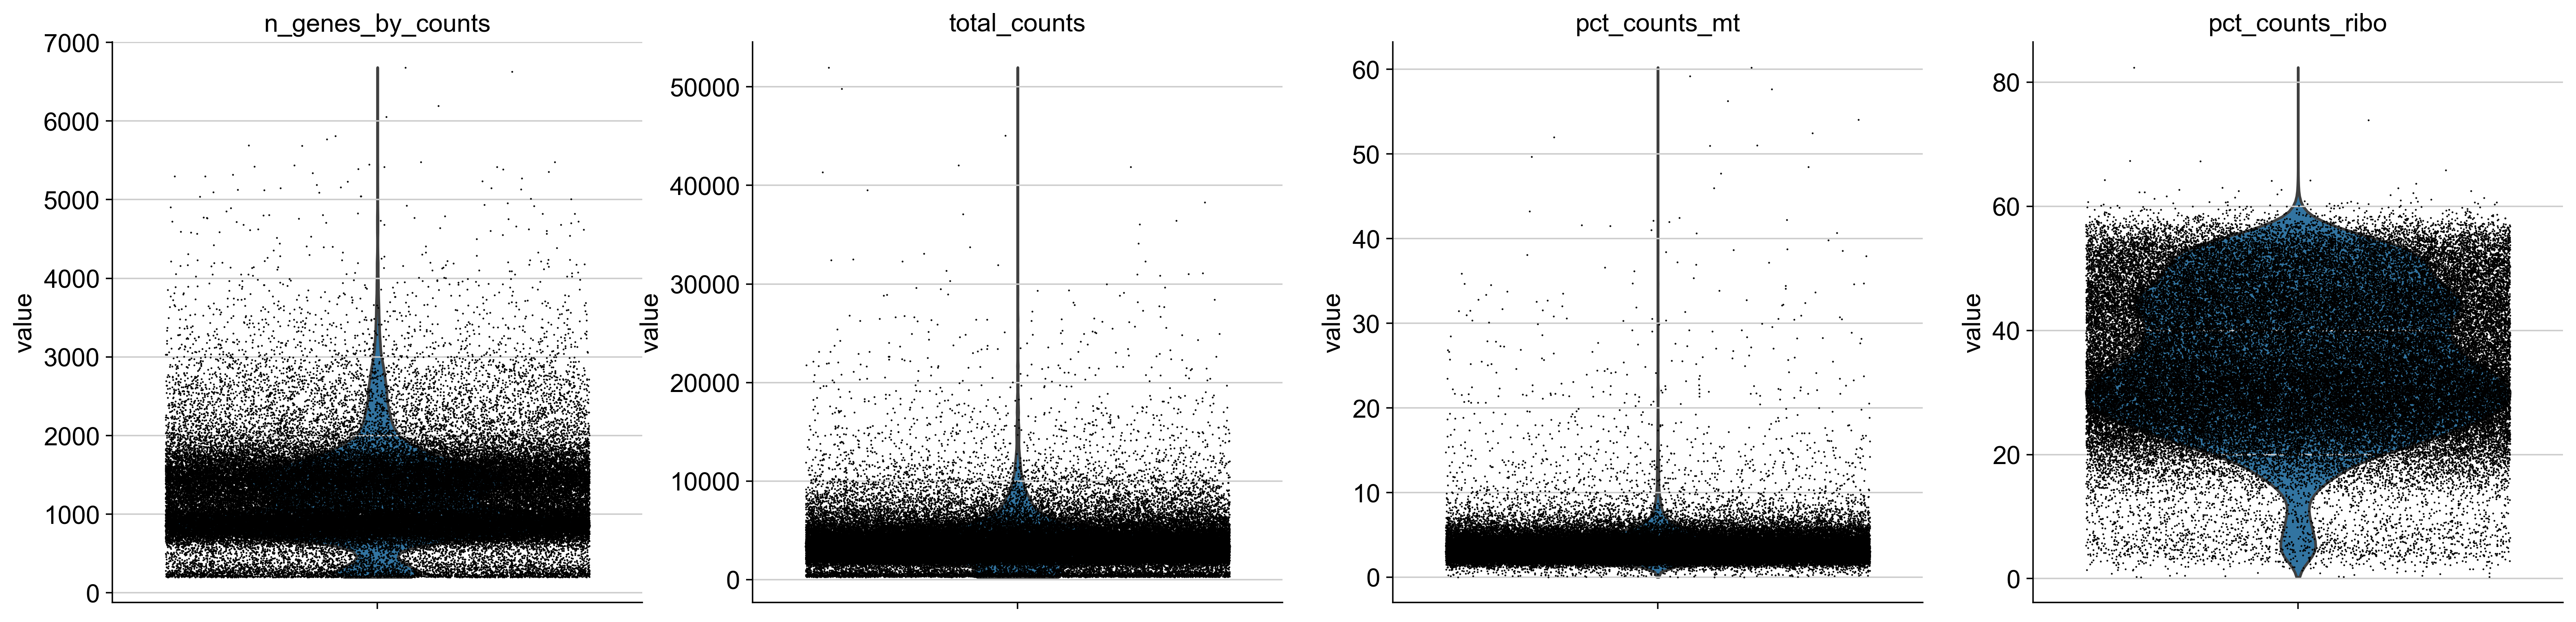

In [82]:
# This particular visualisation was from Anna's notebook.

sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

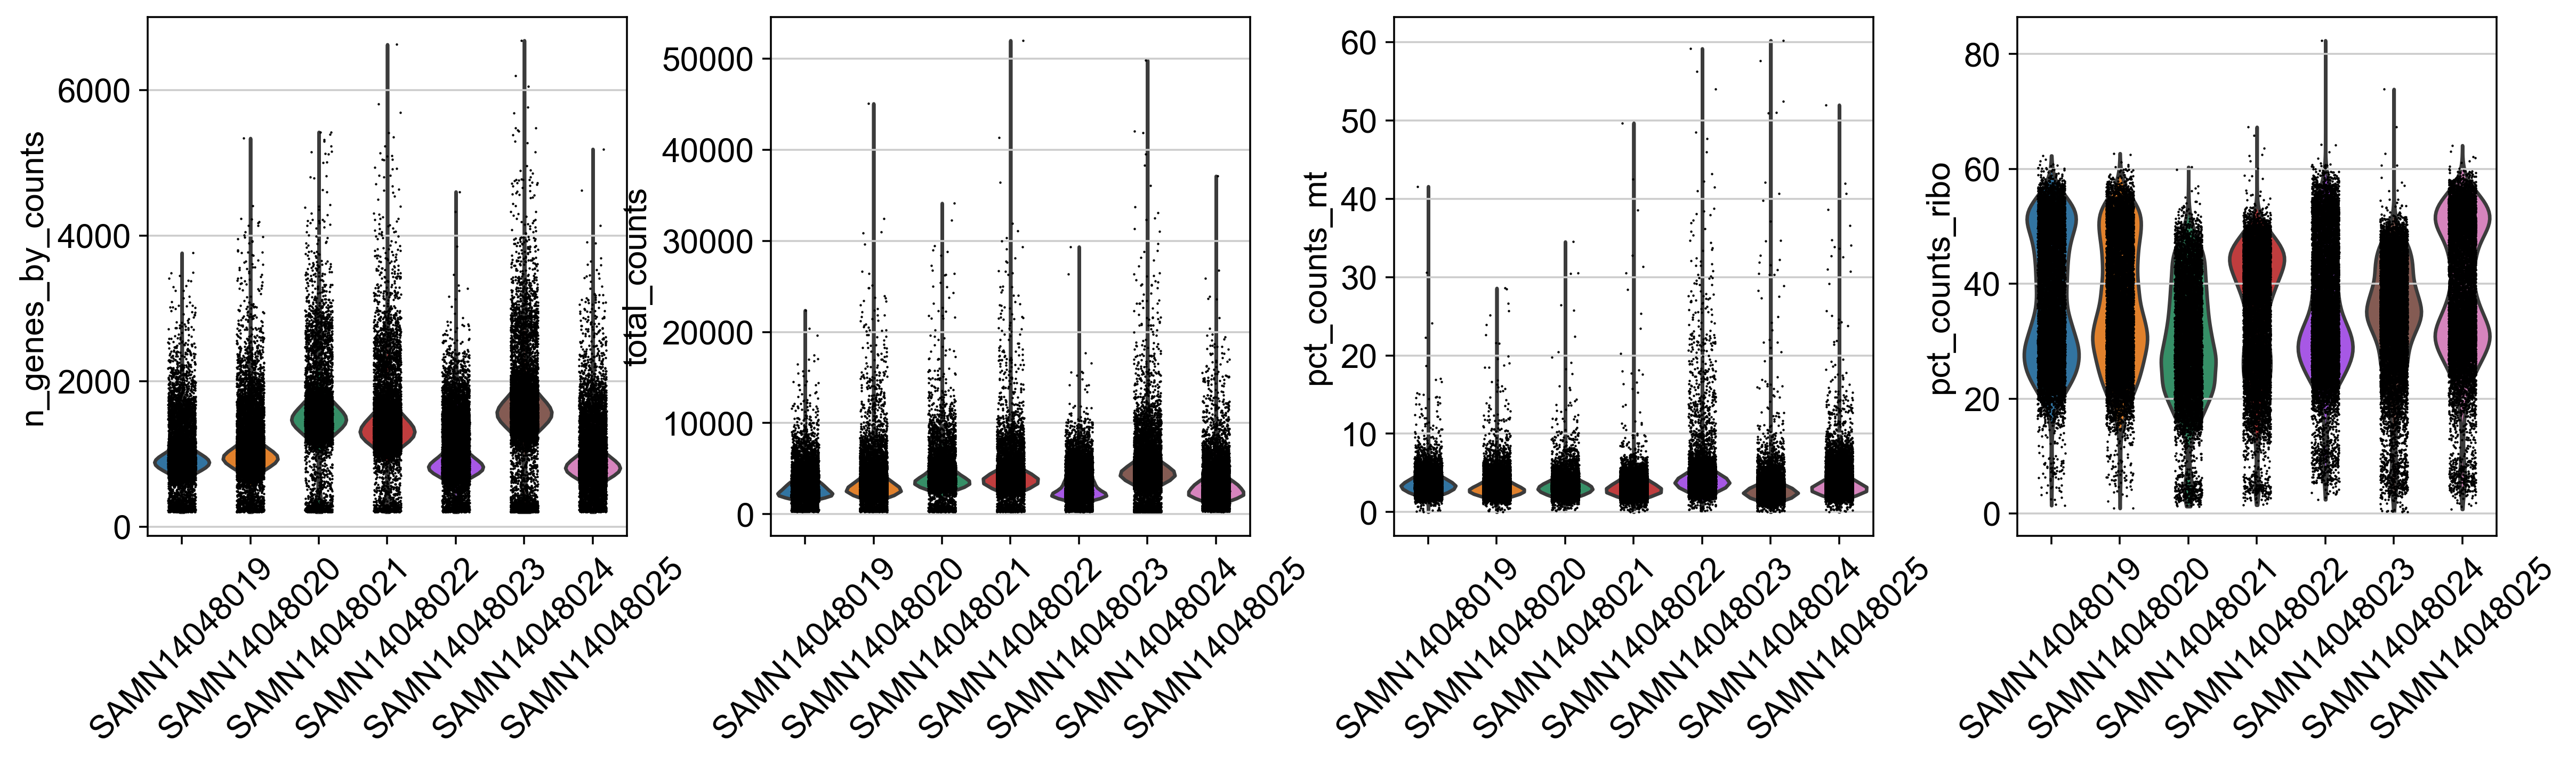

In [83]:

sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

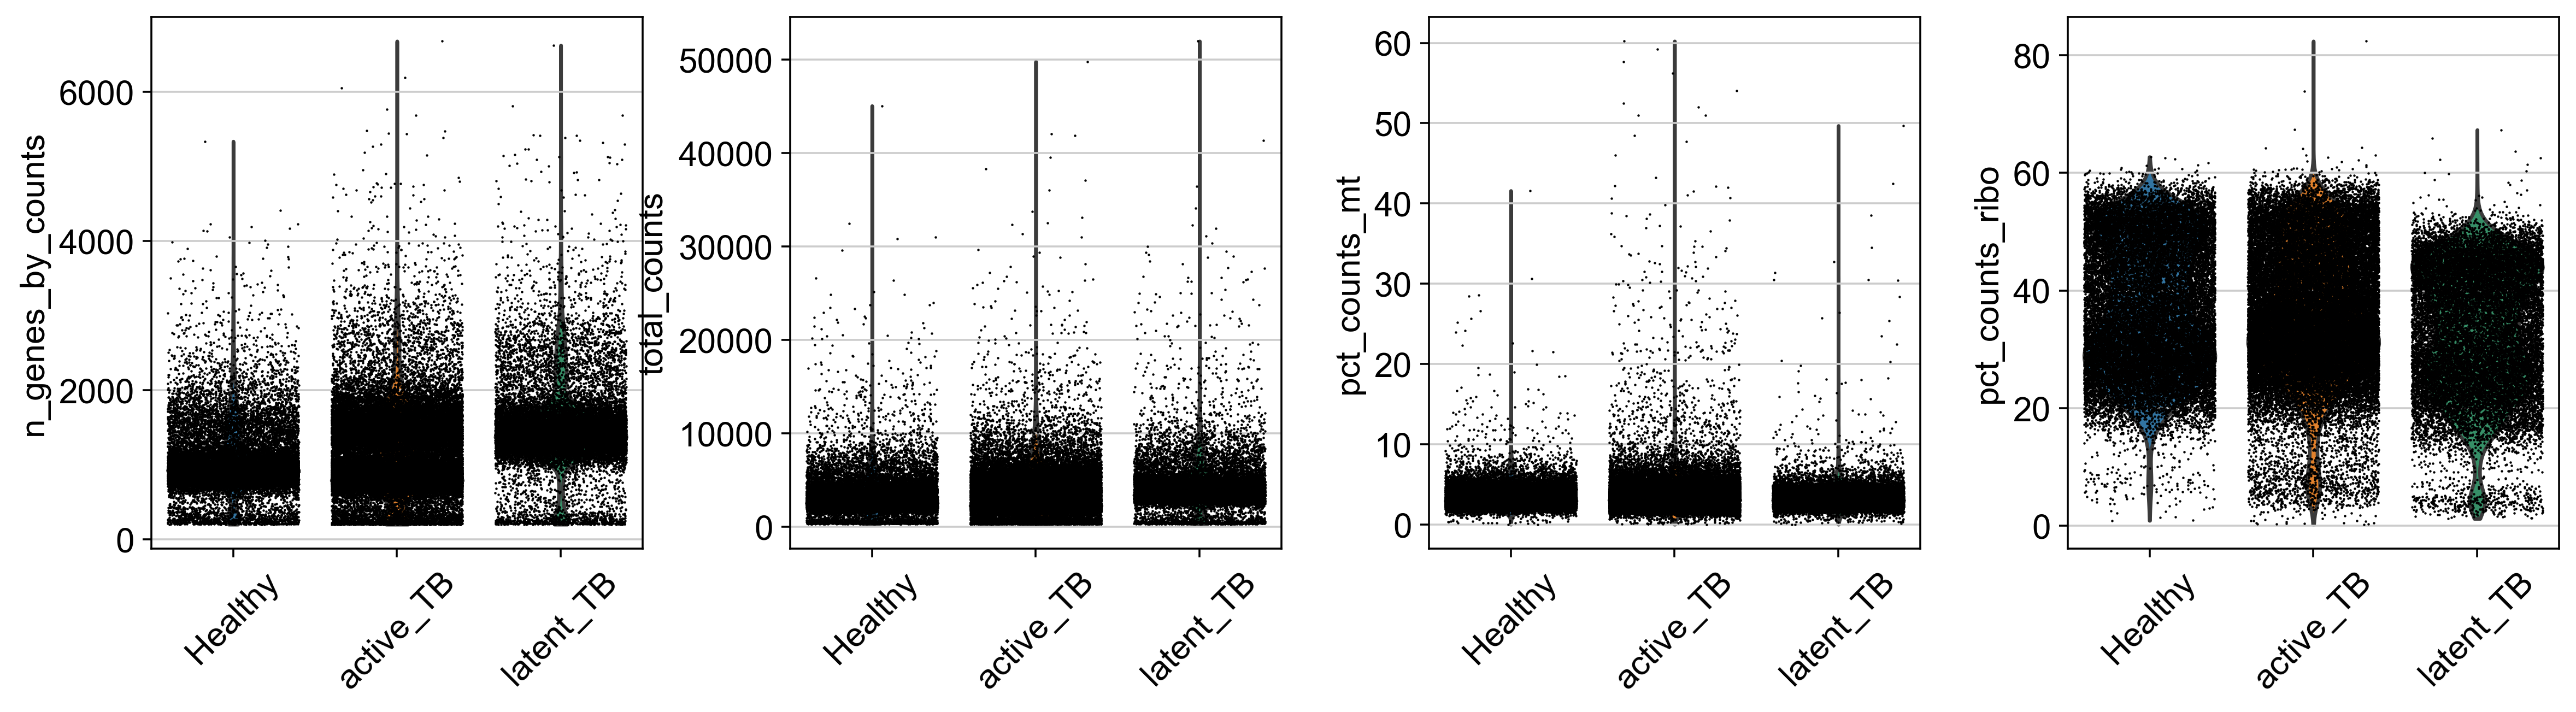

In [84]:
# Also taken from Anna's notebook

sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, groupby = 'status', rotation = 45)

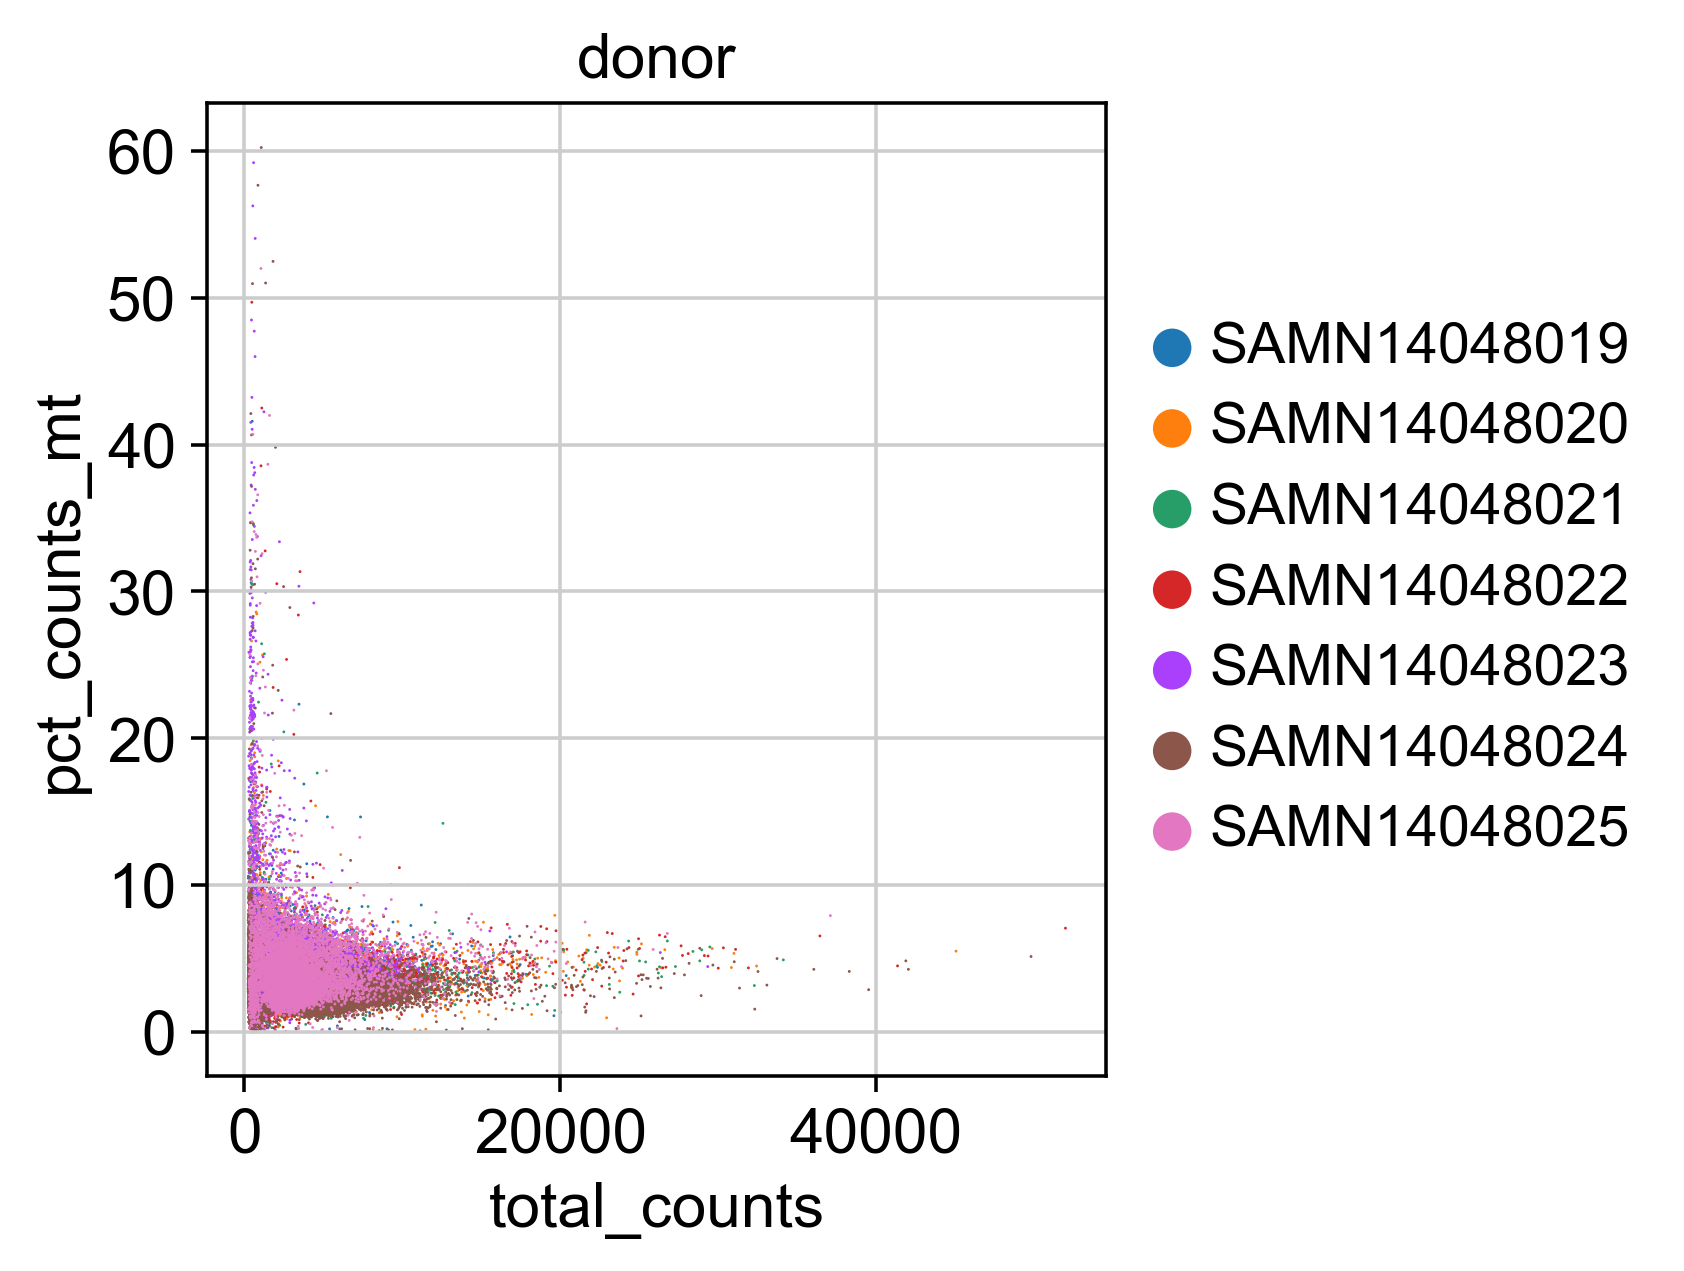

In [85]:
sc.pl.scatter(sample_object, x = 'total_counts', y = 'pct_counts_mt', color = "donor")

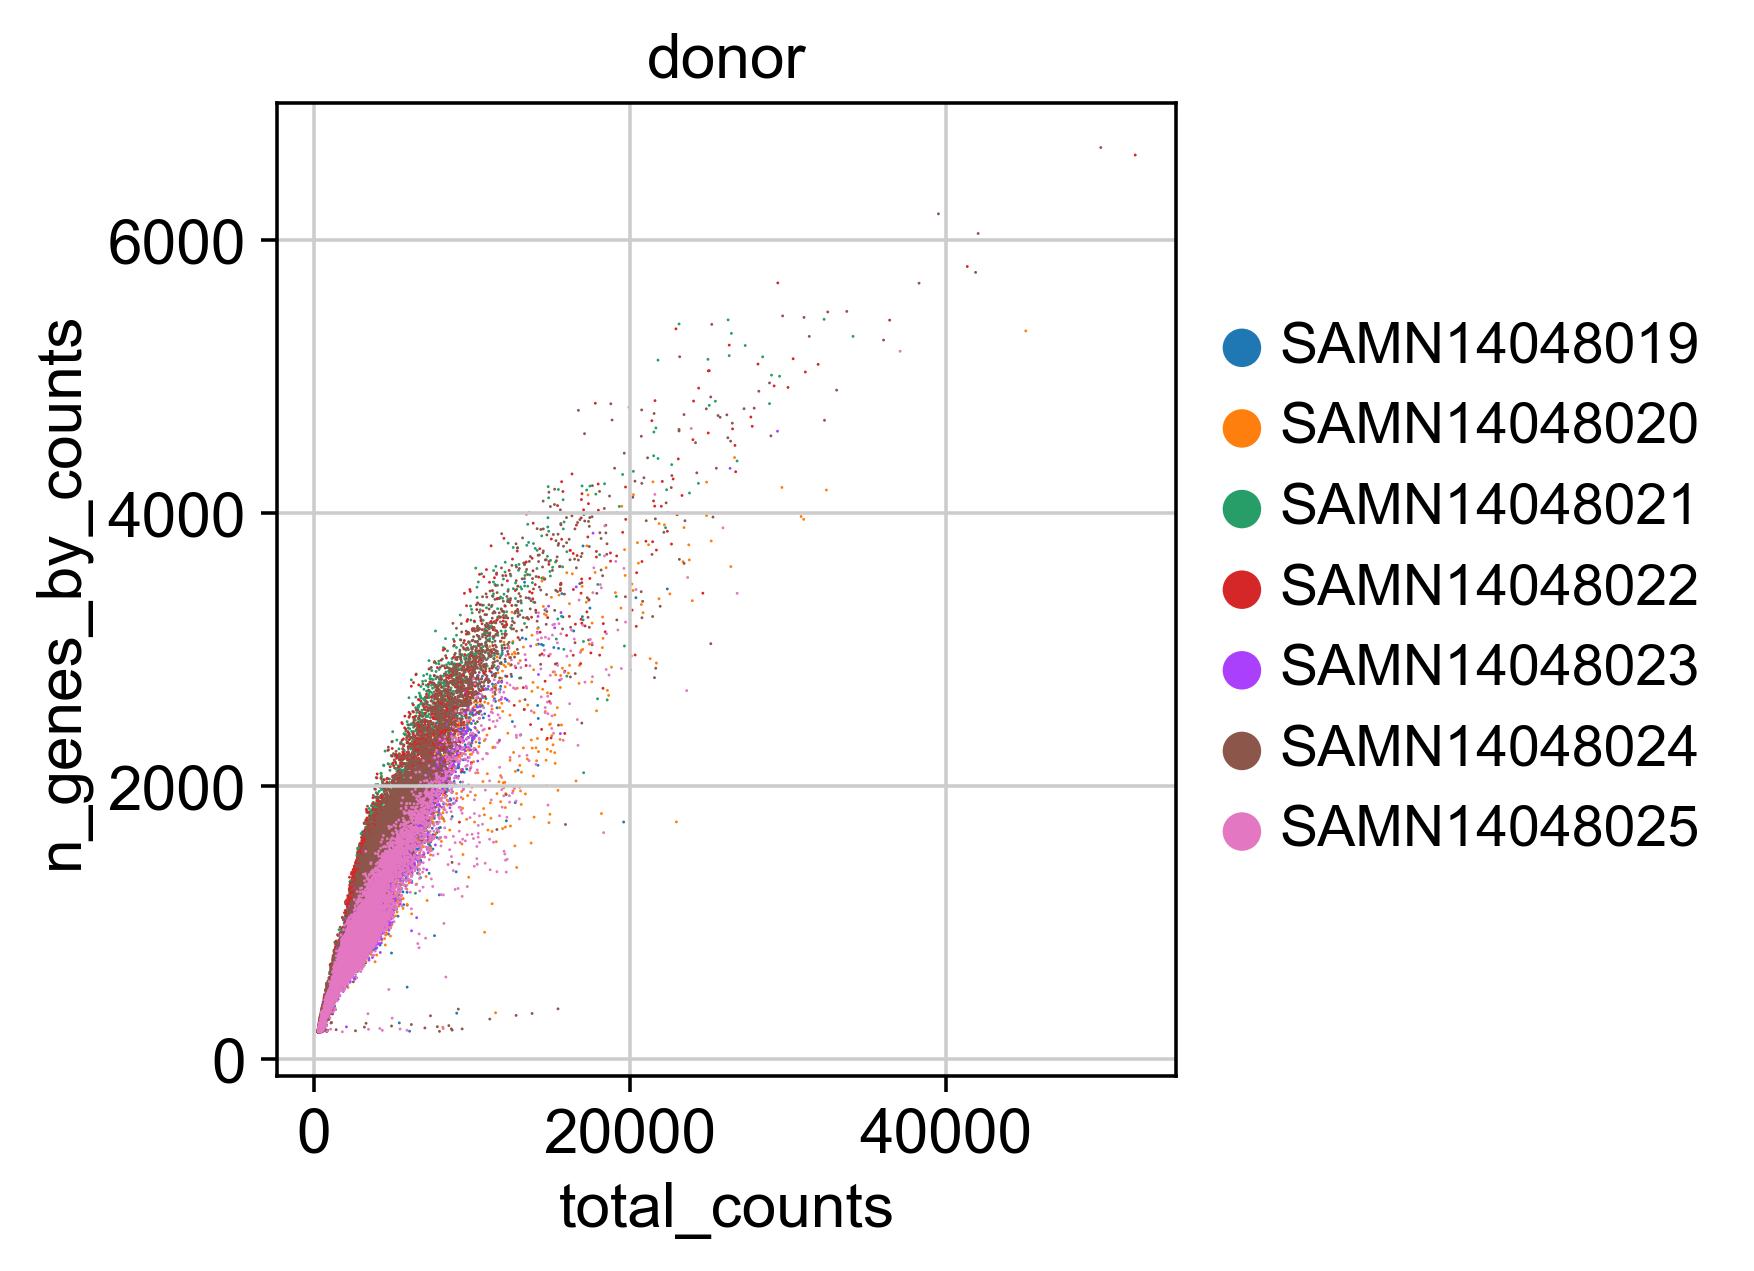

In [86]:
# This was done to visualize the data from another "angle", and also to reproduce graphs seen in the scanpy 3k PBMC tutorial (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)

sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor")

### Add sample sex covariate

In [87]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [88]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

In [89]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Y_RNA', 'SNORA70', 'XGY2', 'RNU6-1334P', 'SRY', 'RNASEH2CP1',
       'TOMM22P2', 'RPS4Y1', 'HSFY3P', 'NAP1L1P2',
       ...
       'PPP1R12BP1', 'RNU6-1314P', 'CYCSP48', 'ANKRD36P1', 'TPTE2P4',
       'CYCSP49', 'SLC25A15P1', 'PARP4P1', 'CCNQP2', 'CTBP2P1'],
      dtype='object', length=429)

In [90]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

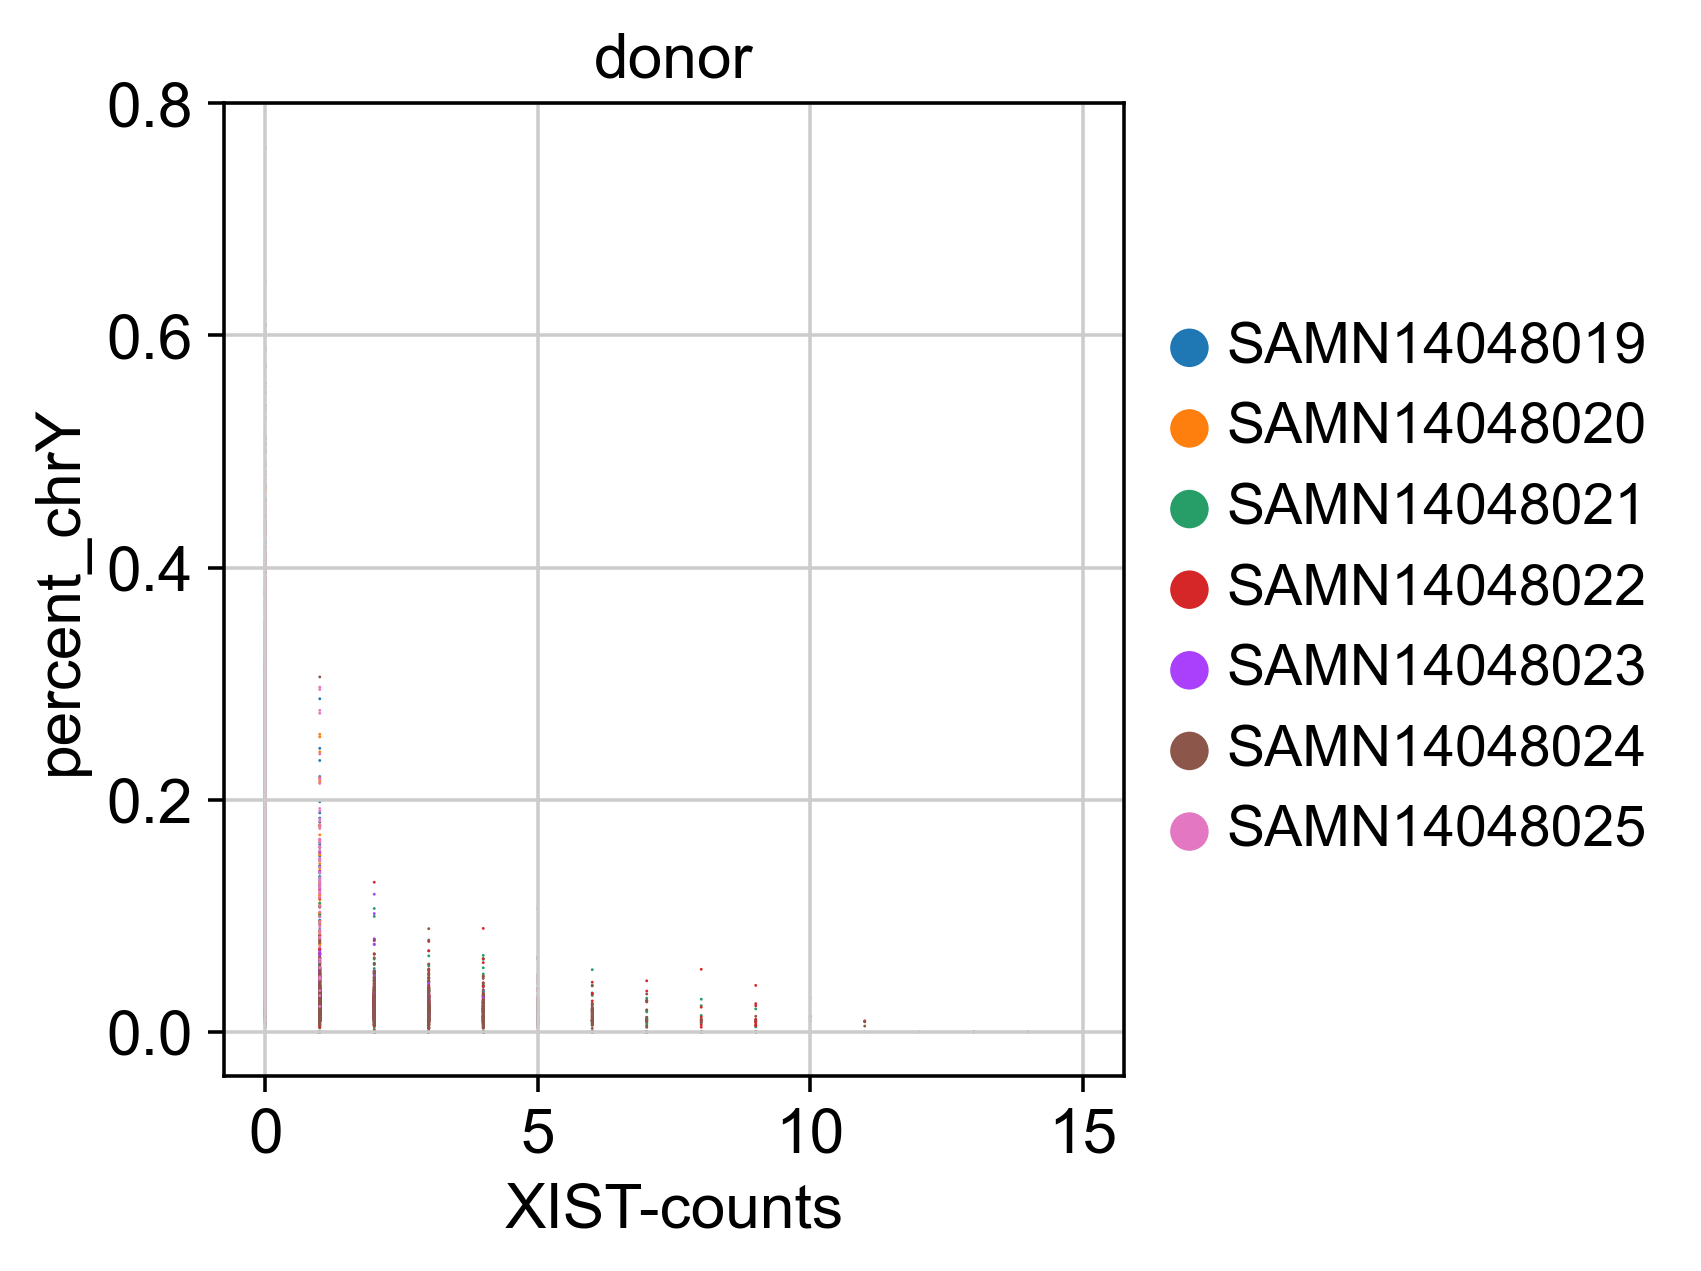

In [91]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')].toarray()

sc.pl.scatter(sample_object, x = 'XIST-counts', y = 'percent_chrY', color = "donor")

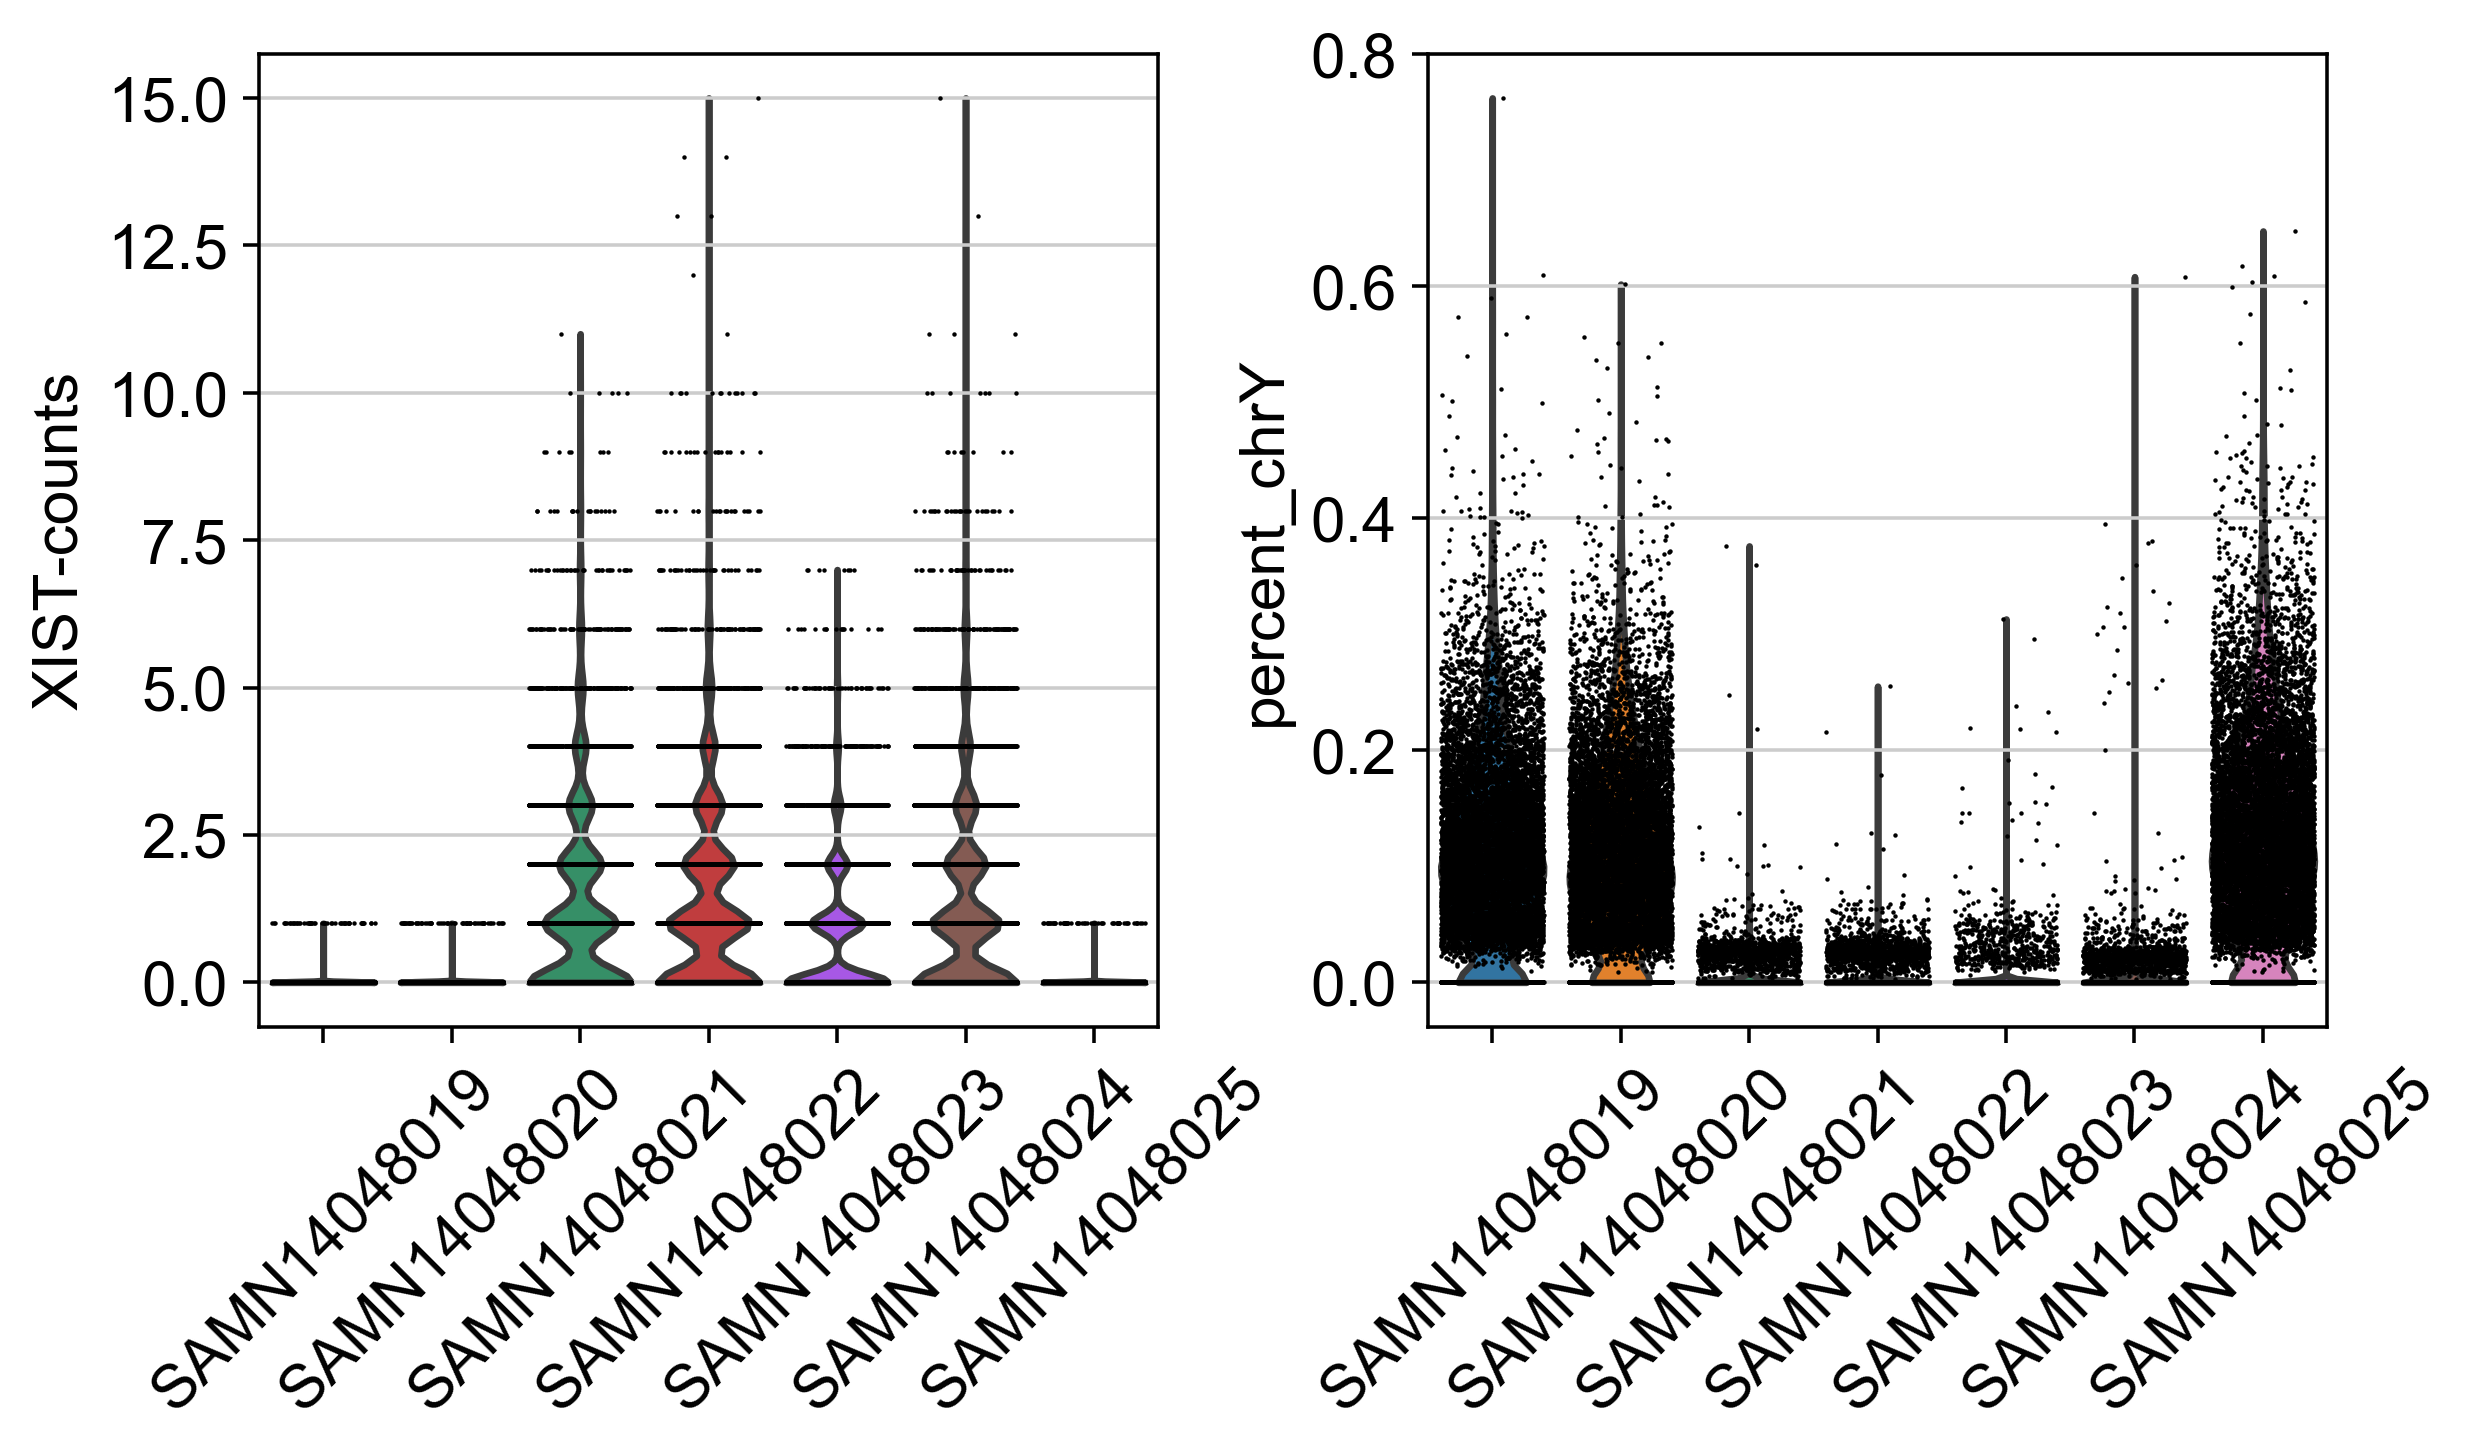

In [92]:
sc.pl.violin(sample_object, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [93]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [94]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [95]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['SPRR3', 'S100A9', 'S100A8', 'RGS18', 'G0S2', 'TMSB10', 'IGKC', 'JCHAIN', 'CXCL8', 'PPBP', 'SPP1', '7SK-4', 'ACTB', 'NAMPT', 'HBB', 'HBD', 'FTH1', 'MALAT1', 'LYZ', 'IGHA2', 'IGHG4', 'IGHG2', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHM', 'B2M', 'HBA2', 'HBA1', 'MT2A', 'MT1X', 'CCL4L2', 'H3-3B', 'FTL', 'IGLL5', 'IGLC2', 'IGLC3', 'IGLC7', 'TMSB4X', 'SAT1', 'TIMP1', 'MT-RNR1', 'MT-RNR2', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'S_score', score of gene set (adata.obs).
    387 total control genes are used. (0:00:00)
computing score 'G2M_score'


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    430 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


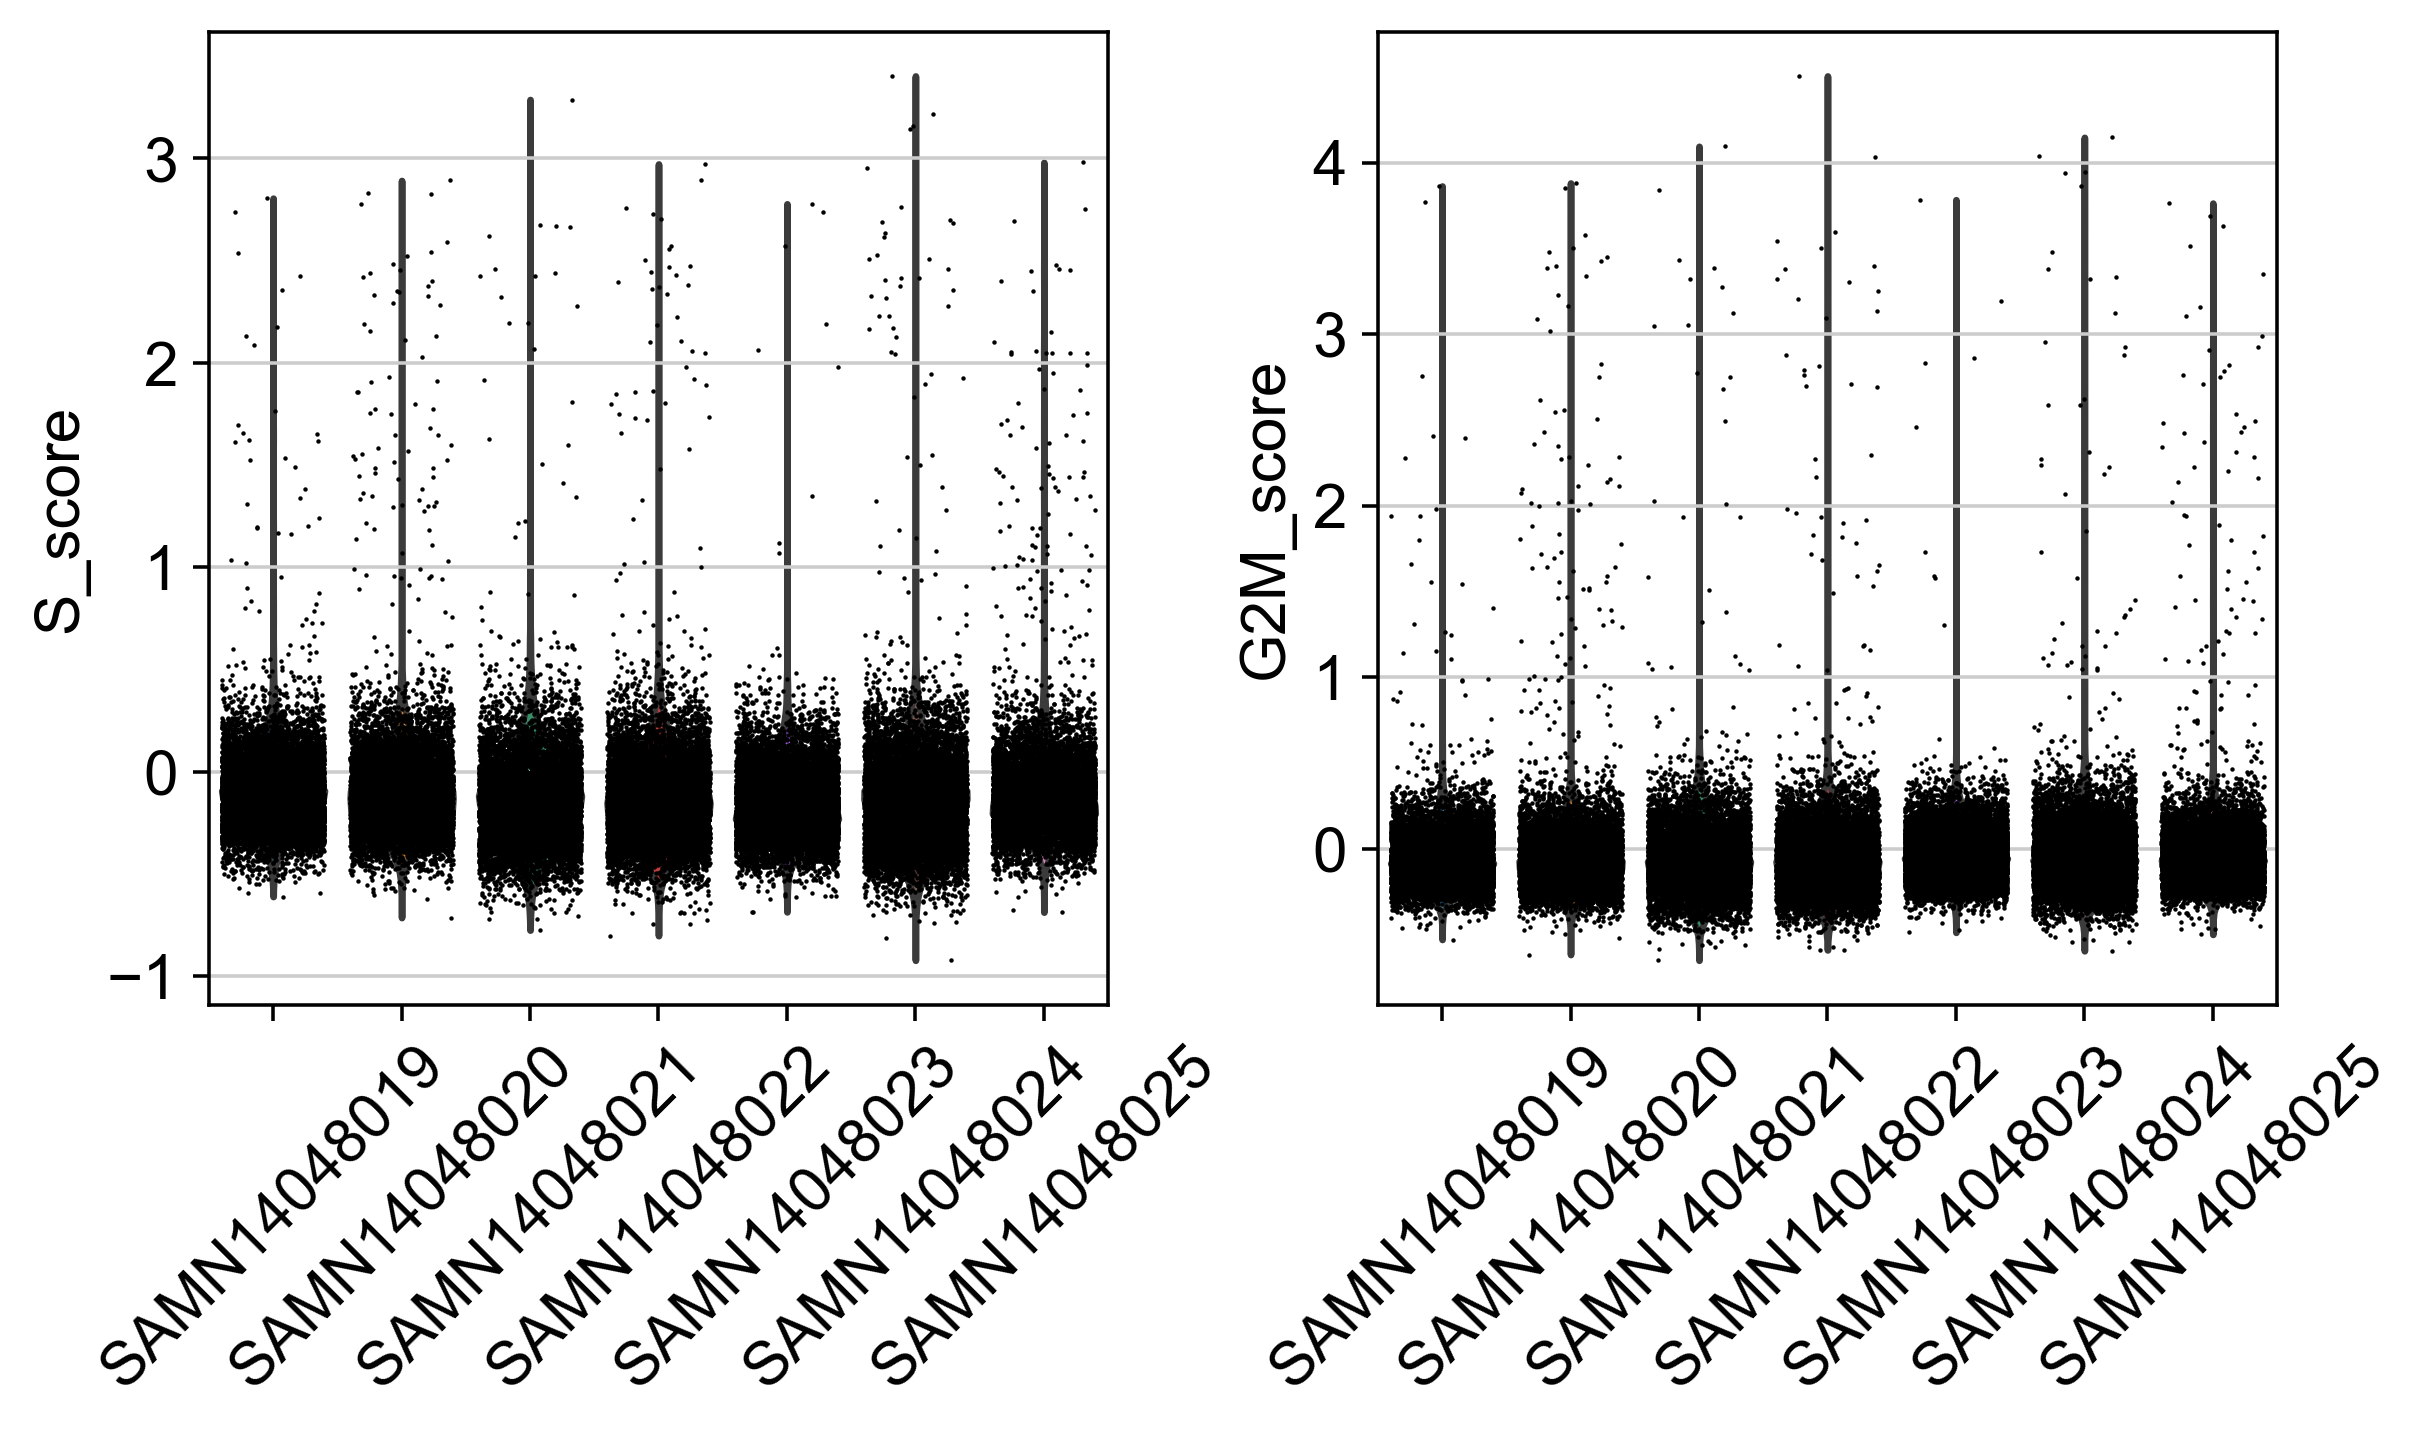

In [96]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [97]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 73146 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'status_colors'

### Predict doublets

Preprocessing...


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 12.3%
Estimated detectable doublet fraction = 75.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 16.4%
Elapsed time: 119.6 seconds


9019

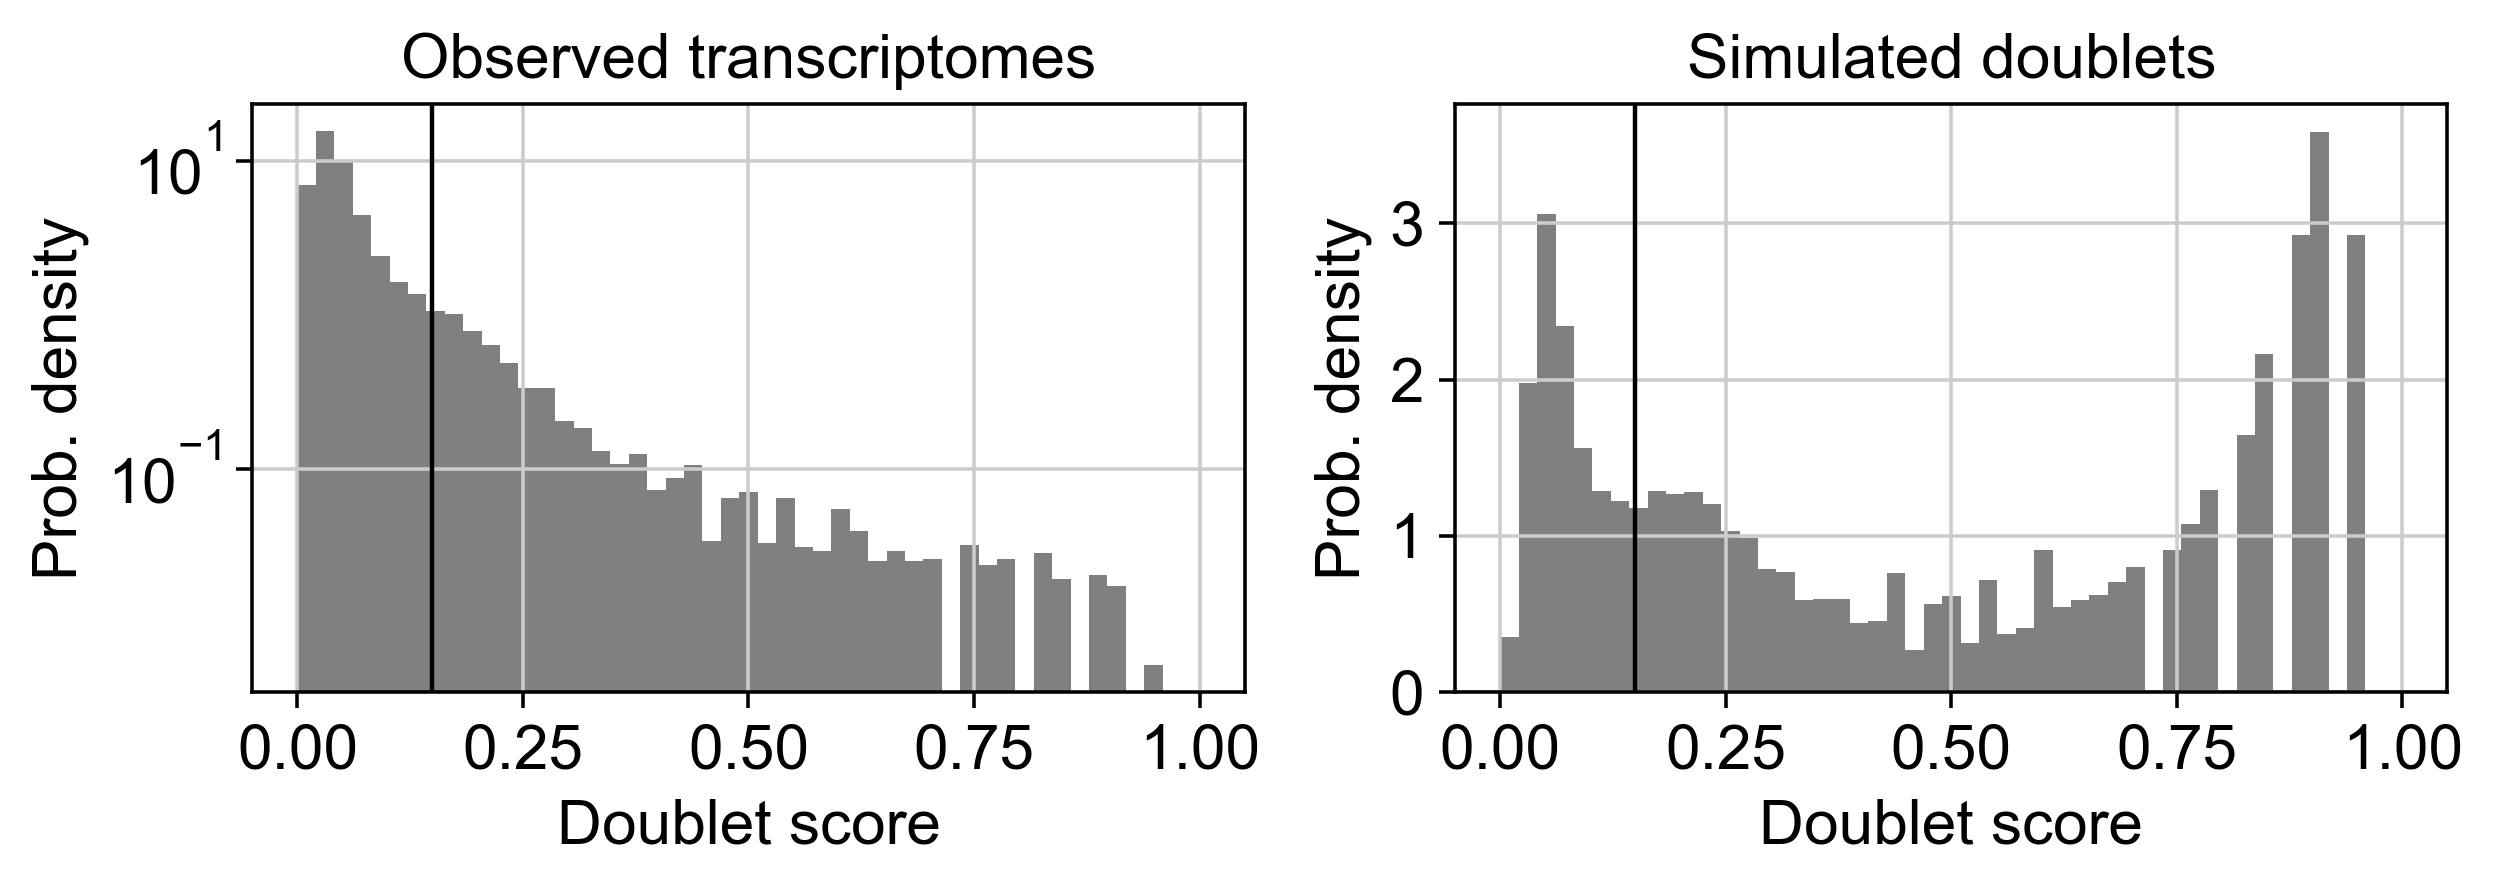

In [98]:
scrub = scr.Scrublet(sample_object.X)
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(sample_object.obs['predicted_doublets'])

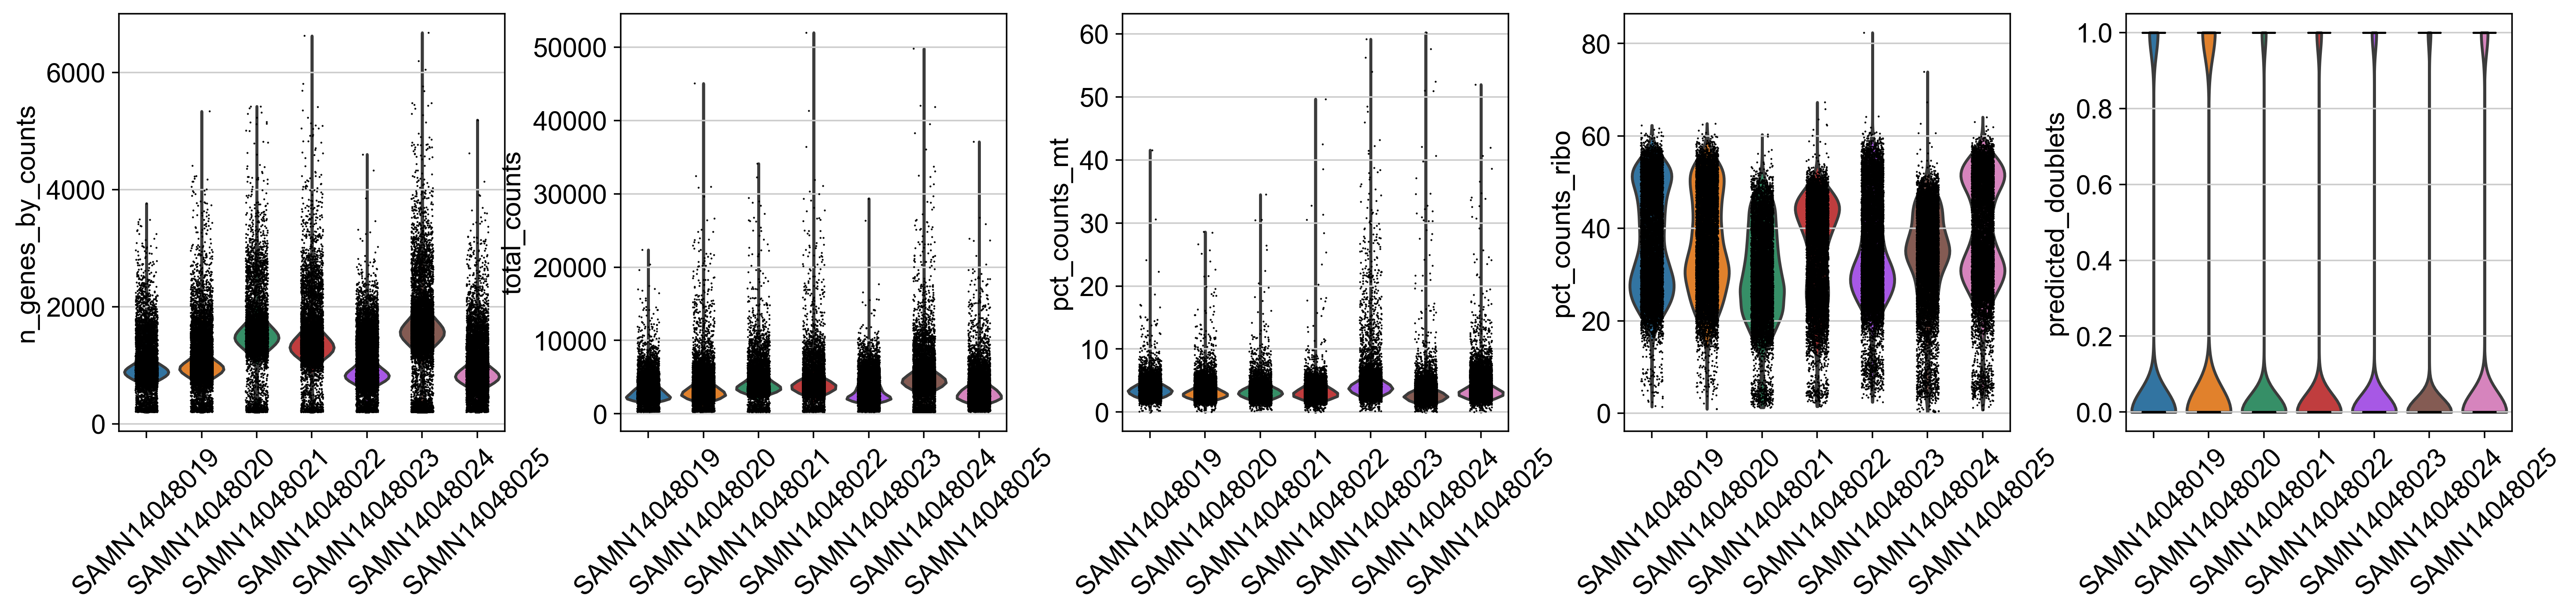

In [99]:
#check if our predicted doublets also have more detected genes in general; what would be the number required to raise suspicions?

sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

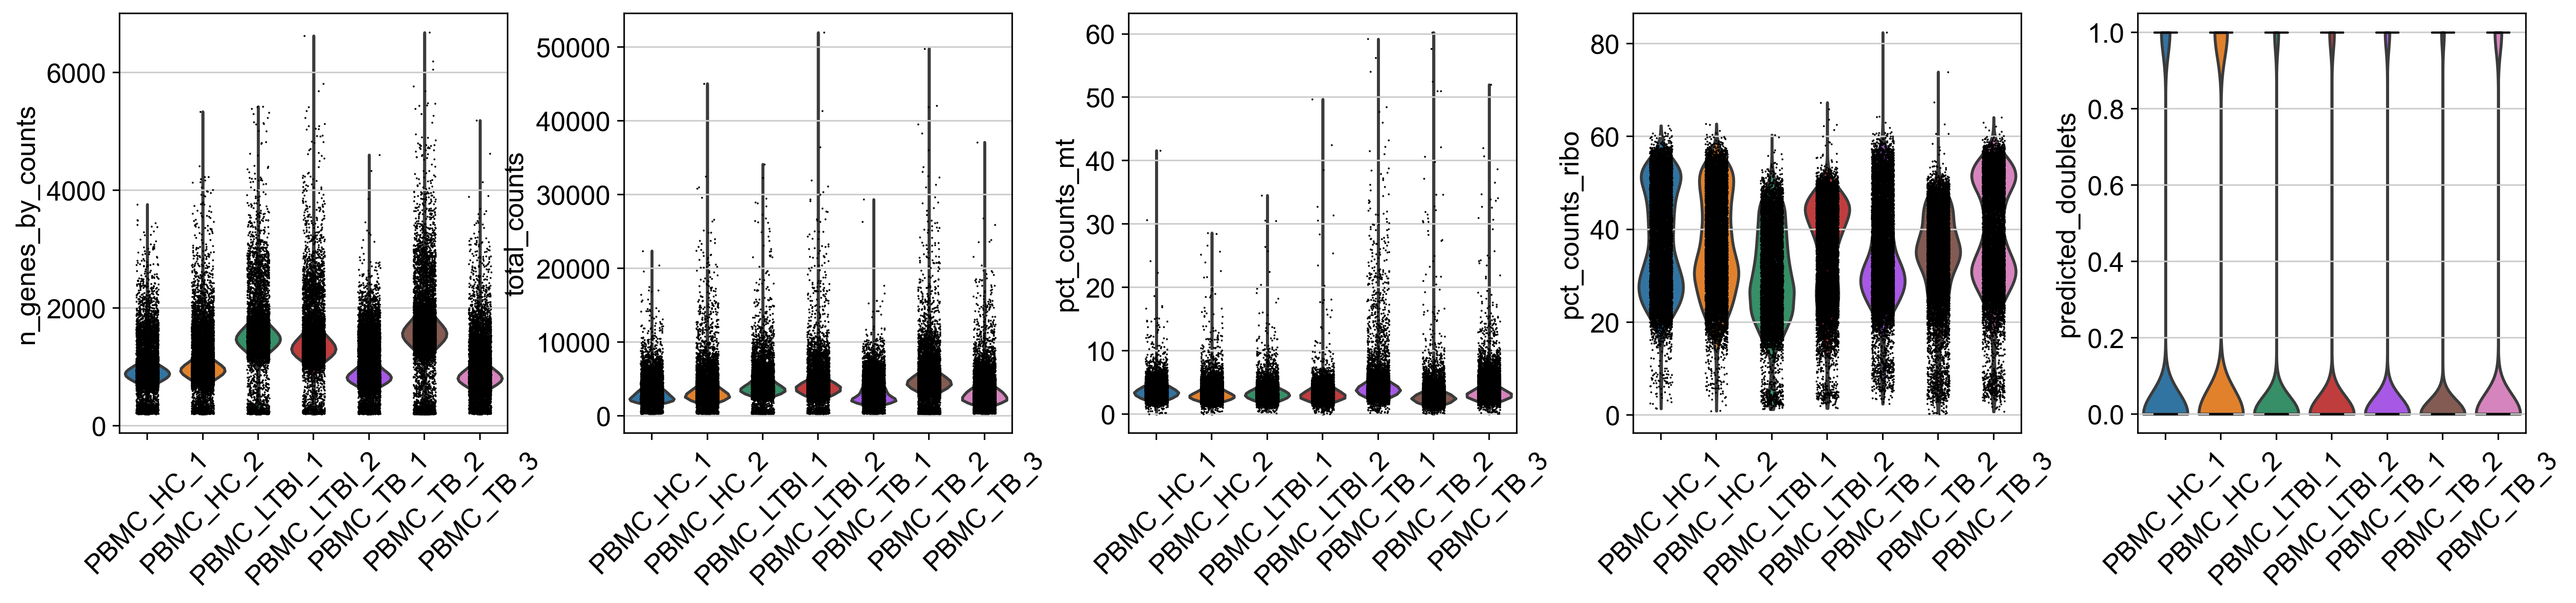

In [100]:
# Grouped by 'sample', just to see
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Prepare counts for individual slots

In [101]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 73146 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'status_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [102]:
sample_object.write('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/CaiY2020_PBMC_TB_QCed_pre-process_mm221121_v2.h5ad')